In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("D:\Innomatics intern\data.csv")
data.head()
data.shape

(50, 7)

# Mean
A mean is simply average of data. There may be 2 types of mean. 1.) Sample Mean 2.) Population Mean

Formula of sample mean can be given as:$$ \overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

Formula of population mean is given as:$$ \mu = \frac{1}{N} \sum_{i=1}^{N} x_i $$

In [7]:
# Find mean of column "Mthly_HH_Income"
def User_Mean(x):
    sum = 0
    for i in x:
        sum += i
    mean = sum/len(x)
    return mean

In [8]:
User_Mean(data["Mthly_HH_Income"])

41558.0

In [9]:
# Cross check using inbuilt function
data["Mthly_HH_Income"].mean()

41558.0

# Median
Median is a middle value of data after arranging the data in ascending order.

$$ sign(x) = \left\{ \begin{array}\\ \left( \frac{n+1}{2} \right)^{th} element & \mbox{if } \ n \ is \ odd \\ \\ \frac{\left( \frac{n}{2} \right)^{th} element + \left( \frac{n}{2} + 1 \right)^{th} element}{2} & \mbox{if } \ n \ is \ even \\ \end{array} \right. $$

In [10]:
# Find median of column "Mthly_HH_Income"
def User_median(x):
    a = len(x)
    index = a // 2
    if a % 2:
        return sorted(x)[index]
    return sum(sorted(x)[index - 1:index + 1]) / 2

In [11]:
User_median(data['Mthly_HH_Income'])

35000.0

In [12]:
# find median using inbuilt function
data["Mthly_HH_Income"].median()

35000.0

# Mode
Mode is the number which is occuring highest time in the dataset

In [13]:
# Find mode of column "Mthly_HH_Income"
x = data['Mthly_HH_Income']

mode_dict = {}
for i in x:
    if i in mode_dict:
        mode_dict[i] = mode_dict[i]+1
    else:
        mode_dict[i] = 0
        
mode = max(mode_dict, key=lambda x: mode_dict[x])
print(mode)

45000


In [14]:
# find mode using inbuilt function
data["Mthly_HH_Income"].mode()[0]

45000

#  Variance
Variance defines how your entire dataset is going to vary, across the mean.

$$ variance \ \sigma^2 = \frac{\sum_{i=1}^{N} \left( x_i - \mu \right)^2}{N}  $$
Assuming the dataset is equally dispersed, then dataset is could be available in both side o the mean and in this case we will get bell shaped curve as shown below:

when $ \sigma^2 &gt; \mu $ or if $ \sigma^2 $ increases, It means every data available in dataset is too far from its average(mean)

In [15]:
# Find variance of column "Mthly_HH_Income"
def User_variance(data):
    mean = sum(data) / len(data)
    var = sum((a - mean) ** 2 for a in data) / len(data)
    return var

In [16]:
User_variance(data['Mthly_HH_Income'])

667478836.0

In [19]:
# find variance using inbuilt function
np.var(data['Mthly_HH_Income'])

667478836.0

# Standard Deviation
Standard deviation is a measure of dispersion of dataset relative to its mean. It is calculated as a square root of a variance.

$$ Standard Deviation \ \sigma = \sqrt{\frac{\sum_{i=1}^{N} \left( x_i - \mu \right)^2}{N}} $$
we can say that standard deviation is exact distance from mean.

The $ \sigma $ we found is 1 standard deviation(1 $ \sigma $) around 68.3% of dataset falls inside 1 $ \sigma $ around 95.5% of dataset falls inside 2 $ \sigma $ around 99.7% of dataset falls inside 3 $ \sigma $

In [22]:
# Find std of column "Mthly_HH_Income"
import math
from scipy import stats
def stdev(x):
    var = User_variance(x)
    std = math.sqrt(var)
    return std
stdev(data['Mthly_HH_Income'])

25835.611779092826

In [24]:
# find standard deviation using inbuilt function
np.std(data["Mthly_HH_Income"])

25835.611779092826

# Correlation
correlation helps to find out how strongly 2 features(x & y) are correlated and also gives the direction of relationship.

Here we are going to discuss 2 types of correlation. 1.) Pearson Correlation Coefficient 2.) Spearman's rank correlation coefficient

Pearson Correlation Coefficient
$$ Pearson \ Correlation \ Coefficient = \rho (x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y} $$
\$$\rho (x,y) = -1 \leq \rho \leq 1 $$

In [25]:
# Find correlation of column "Mthly_HH_Income"
def corr(x, y):
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(xi*xi for xi in x)
    sum_y_sq = sum(yi*yi for yi in y)
    psum = sum(xi*yi for xi, yi in zip(x, y))
    num = psum - (sum_x * sum_y/n)
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
    if den == 0: return 0
    return num / den

corr(data['Mthly_HH_Income'],data['Mthly_HH_Expense'])

0.6492152549316461

In [26]:
# find correlation using inbuilt function
x = data['Mthly_HH_Income']
y = data['Mthly_HH_Expense']

correlation = np.corrcoef(x, y)
print(correlation)

[[1.         0.64921525]
 [0.64921525 1.        ]]


# Normal Distribution
A normal distribution, sometimes called the bell curve, is a distribution that occurs naturally in many situations. For example, the bell curve is seen in scores of students. The bulk of students will score the average (C), while smaller numbers of students will score a B or D. An even smaller percentage of students score an F or an A. This creates a distribution that resembles a bell.
The bell curve is symmetrical. Half of the data will fall to the left of the mean; half will fall to the right. Many groups follow this type of pattern. That’s why it’s widely used in business, statistics.
Parameters of Normal Distribution - $ \mu - mean, \ \sigma - std $$$ Normal \ Distribution = \frac{1}{\sqrt{2 \pi} \ \ \sigma} \ e^{(\frac{- \ (x - \mu)^{2}}{2 \sigma^{2}})} $$

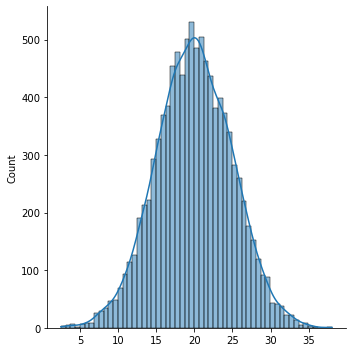

In [27]:
# Plot normal distribution using distplot
normal = np.random.normal(loc = 20, scale = 5, size=10000)

sns.displot(normal, kde = True)

# Features of Normal Distribution
  (i) The mean, mode and median are all equal.                                                                                 
 (ii) The curve is symmetric at the center (i.e. around the mean, μ).                                                           
(iii) Exactly half of the values are to the left of center and exactly half the values are to the right.                       
 (iv) The total area under the curve is 1.

# Positively Skewed Normal Distribution
A positively skewed distribution is the distribution with the tail on its right side. The value of skewness for a positively skewed distribution is greater than zero.

# Negatively Skewed Normal Distribution
A negatively skewed distribution is the distribution with the tail on its left side. The value of skewness for a negatively skewed distribution is less than zero.

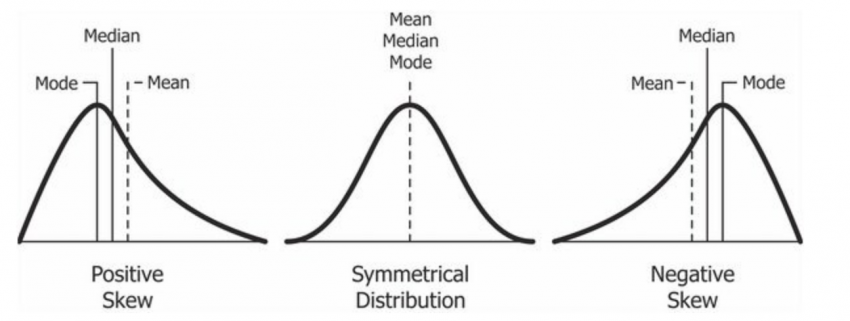

# Effect on Mean, Median and Mode due to Skewness
  (i) if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode.   
 (ii) If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

# Q-Q Plot 
Q-Q Plot refers to quantile-quantile plot. It is a way to test normality of a distribution. With the help of this we can check skewness, kurtosis. It is a plot of the quantiles of two distributions against eachother. The pattern of the points in the plot is used to compare the two distributions.